###  Imports
first execute all the needed imports:

In [5]:
import tensorflow as tf
from tensorflow import keras
import requests
import PIL
from PIL import Image
from io import BytesIO
from IPython.display import display

Because we already have a model we just need to load it

In [6]:
model = keras.models.load_model('carClassifierModel/')
model.summary()
classNames = ['audi', 'bmw', 'mercedesBenz']

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

The next step is to load the images from the given urls and display them. Furthermore, the images get resized to fit the model.

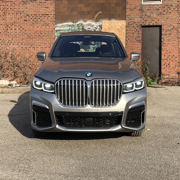

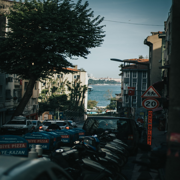

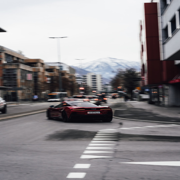

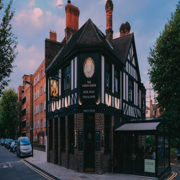

In [11]:
urls = ["https://source.unsplash.com/random/?car ,audi", "https://source.unsplash.com/random/?car ,bmw", "https://source.unsplash.com/random/?car ,mercedes"]
imgAarray =[]
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        img = PIL.Image.open(BytesIO(response.content))
        img = img.resize((180, 180))
        display(img)
        imgAarray.append(keras.preprocessing.image.img_to_array(img))

Now that we got our images we need to classify them


In [12]:
for image in imgAarray:
    img_array_badge = tf.expand_dims(image, 0) # Create a batch
    predictions = model.predict(img_array_badge)
    score = tf.nn.softmax(predictions[0])
    print("[", end='')
    for i, classname in enumerate(classNames):
        print(classname + ": " + str(round(score.numpy()[i]*100, 2))+ "%, " , end='')
    print("]")


[audi: 15.09%, bmw: 24.53%, mercedesBenz: 60.37%, ]
[audi: 7.66%, bmw: 22.89%, mercedesBenz: 69.46%, ]
[audi: 40.57%, bmw: 4.38%, mercedesBenz: 55.05%, ]
[audi: 7.1%, bmw: 9.02%, mercedesBenz: 83.88%, ]
